# Matrix Multiplication Runtime Data Movement Visualization

## Overview

The purpose of this notebook is to visually describe how the A, B, and C matrices are tiled and transformed in the matrix multiply whole array design. To do this, we use some of the taplib (Tensor Access Pattern Library) tools included in IRON.

## Generate the data used for visualization

In [1]:
# Import the main method from mat mul
from whole_array import my_matmul

# Note: can also use:
# from whole_array_placed import my_matmul
from aie.extras.context import mlir_mod_ctx
from IPython.display import HTML

In [2]:
# Call the mat mul function with generate_taps=True
M = 640
K = 896
N = 768
m = 16
k = 32
n = 48
n_aie_cols = 4
n_aie_rows = 4
b_col_maj = False

with mlir_mod_ctx() as ctx:
    A_taps, B_taps, C_taps = my_matmul(
        M=M,
        K=K,
        N=N,
        m=m,
        k=k,
        n=n,
        n_aie_cols=n_aie_cols,
        dtype_in_str="i16",
        dtype_out_str="i32",
        b_col_maj=b_col_maj,
        trace_size=0,
        generate_taps=True,
    )

# Generate (static) Data Movement Pattern for A, B, and C

Note: It can take some time (order of seconds) to generate each graph

## How to Read These Graphs

The ***Access Order*** graph is a heatmap showing the order that data is conceptually pushed or pull off the wires in DMA operations. The graph goes from cold (black) to hot (white).

The ***Access Count*** graph shows how many times each element is accesses in the sequence of data movement tiles. This is also a heatmap, but typically, each element is access the same amount of times (the max value is displayed in the graph title) so these graphs tend to be a single color. The count can be raised from a single data movement that causes a location to be accessed more than once, or it can be from multiple data movements that access the same element.

## 1. Data Movement Pattern for A

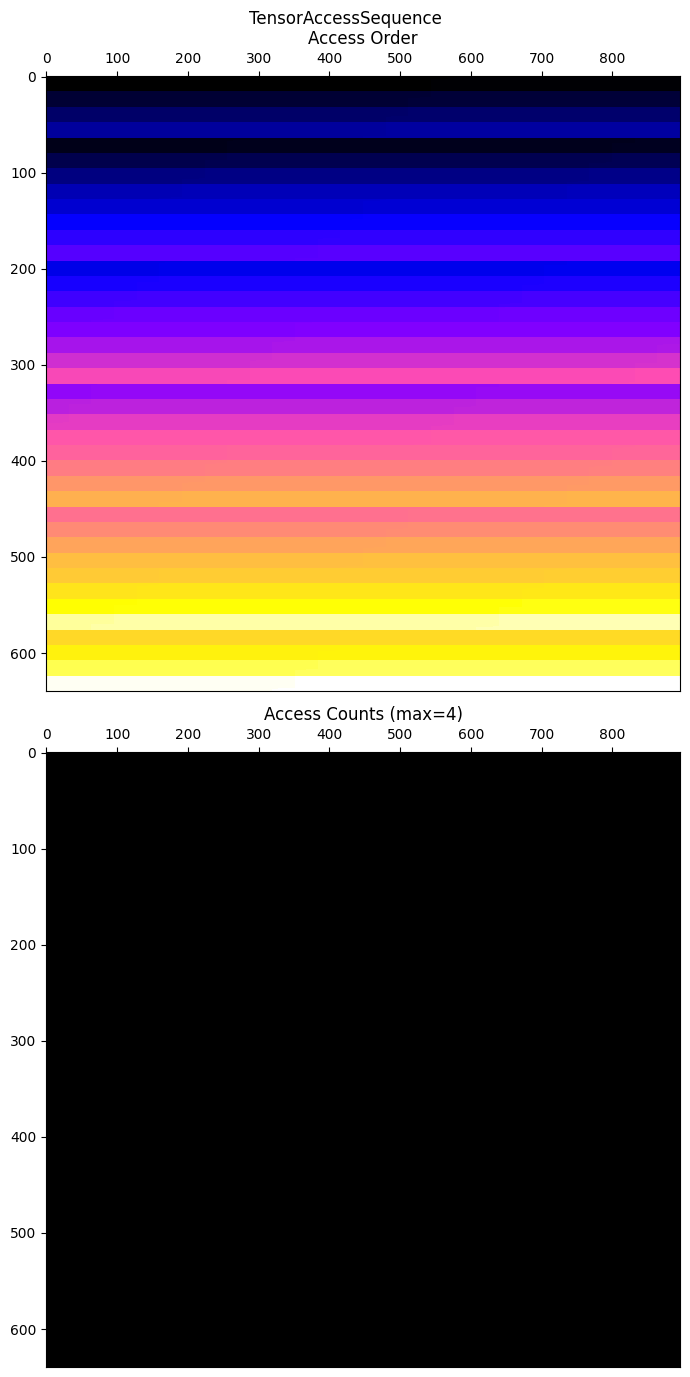

In [3]:
A_taps.visualize(plot_access_count=True)

## 2. Data Movement Pattern for B

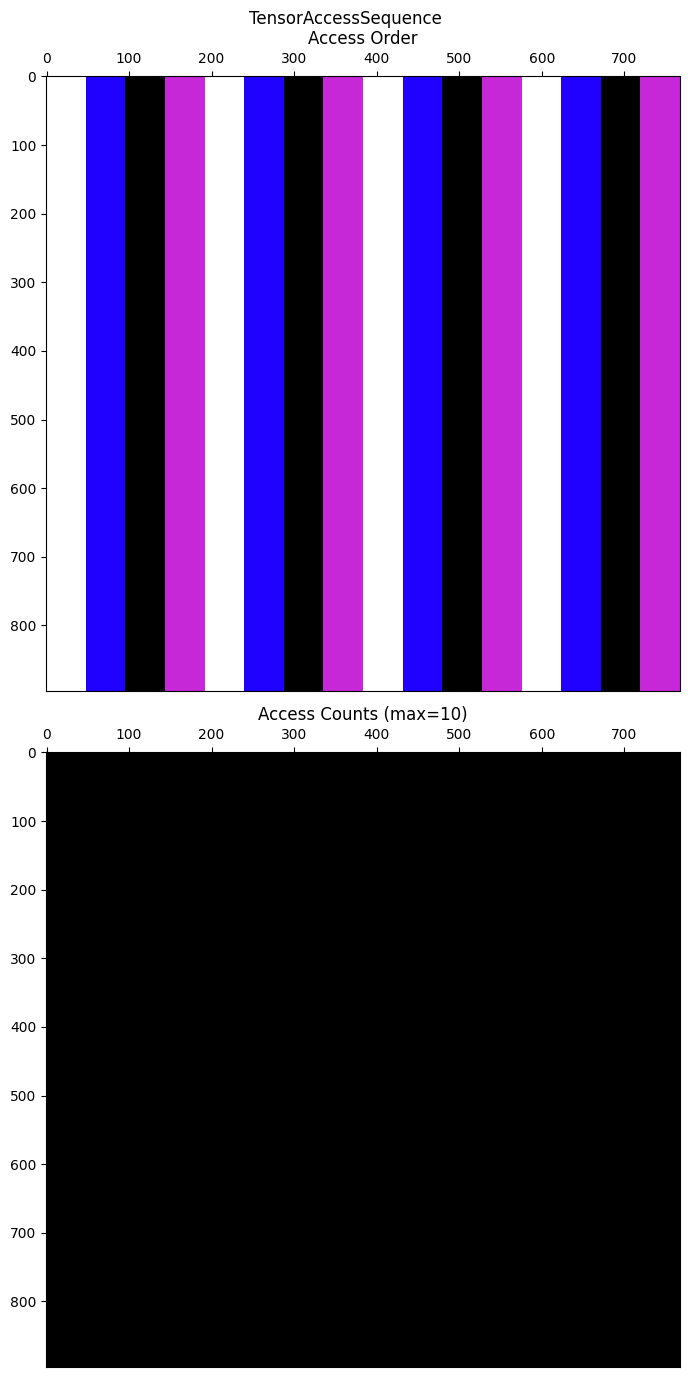

In [4]:
B_taps.visualize(plot_access_count=True)

## 3. Data Movement Pattern for C

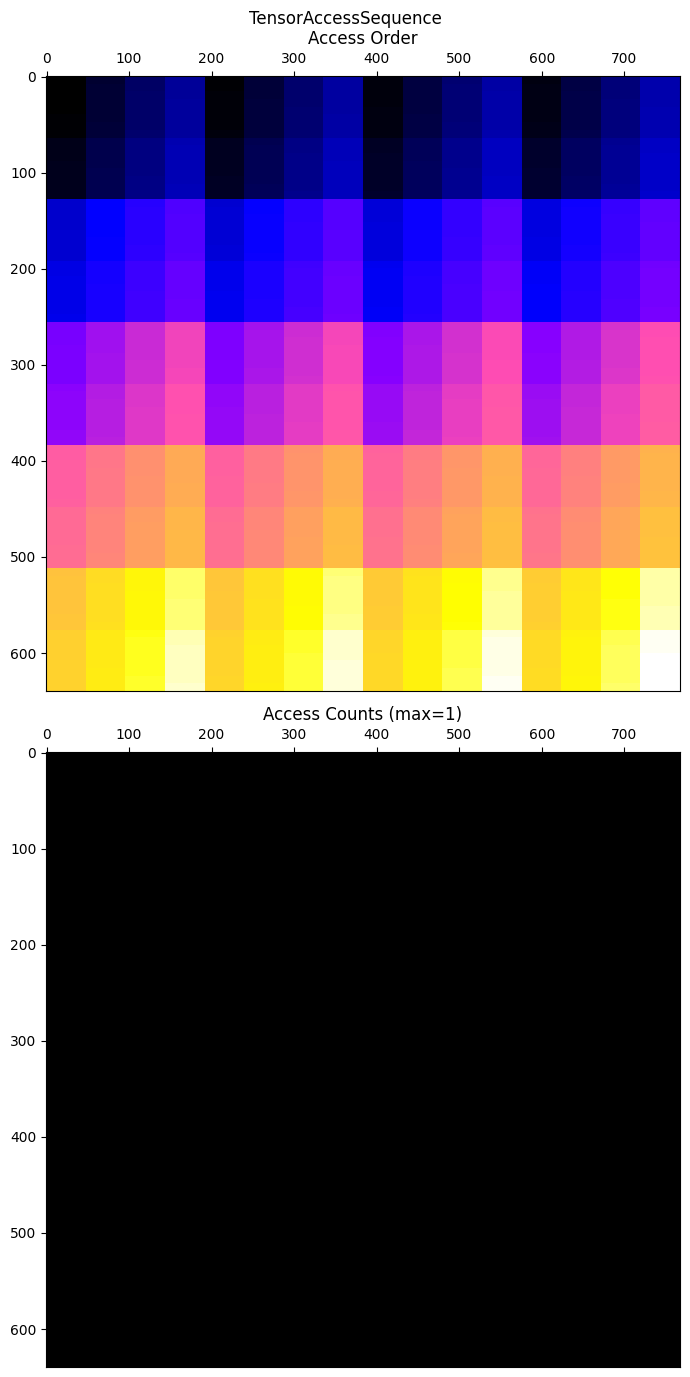

In [5]:
C_taps.visualize(plot_access_count=True)

# Generate (animated) Data Movement Patterns for A, B, and C

Note: It can take some time (order of minutes) to generate each animation.

## 1. Data Movement Pattern for A

In [6]:
a_anim = A_taps.animate()
HTML(a_anim.to_jshtml())

## 2. Data Movement Pattern for B

In [7]:
b_anim = B_taps.animate()
HTML(b_anim.to_jshtml())

## 3. Data Movement Pattern for C

In [8]:
c_anim = C_taps.animate()
HTML(c_anim.to_jshtml())